In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [634]:
import numpy as np
import logging
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import importlib 
plt.rcParams["figure.figsize"] = (8,8)

In [636]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D

In [351]:
# Reload filles after changes
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)

<module 'scripts.heatClustermap' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/VisualizeBinaryTrees/scripts/heatClustermap.py'>

In [121]:
#Data dir
input_dir= 'data/'
# input_dir ="../ToyJetsShower/data/"

In [667]:
input_jet = 'tree_9_truth'

In [668]:
with open(input_dir+ str(input_jet) + '.pkl', "rb") as fd: 
    truth_jet = pickle.load(fd, encoding='latin-1')[0]

jet_name = ('_').join(input_jet.split('_')[-3:-1])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

display(truth_jet["name"])

'tree_9'

In [632]:
# Number of constituents
linkageList.runTraverse_jet(truth_jet)
len(truth_jet["outers_list"])

44

In [633]:
# Recluster jet
reclusterKt = reclusterTree.recluster(truth_jet, alpha=1)
reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1)
reclusterCA = reclusterTree.recluster(truth_jet, alpha=0)

out_filename= data/tree_9_1.pkl
out_filename= data/tree_9_-1.pkl
out_filename= data/tree_9_0.pkl


In [358]:
# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

# HEAT CLUSTERMAP VISUALIZATIONS

------------------------------------------------------------
truth heat data ----  alpha row: truth -- alpha column: truth


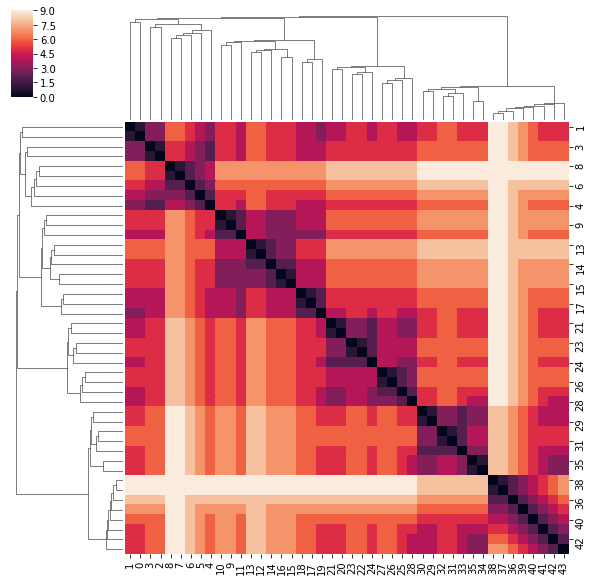

------------------------------------------------------------
alpha row: 1 -- alpha column: truth


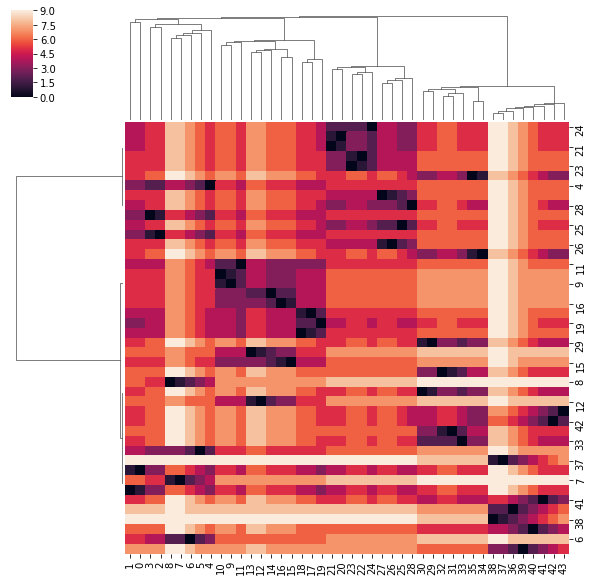

In [670]:
# outFilename="plots/heatClustermap/figTruthTruth_singlepath_jet2.jpg"
outFilename=None
heatClustermap.heat_dendrogram(
    truthJet=truth_jet,
    recluster_jet1 = reclusterKt, 
    heat_map=True,
    full_path=False, 
    FigName=outFilename)

------------------------------------------------------------
alpha row: -1 -- alpha column: -1


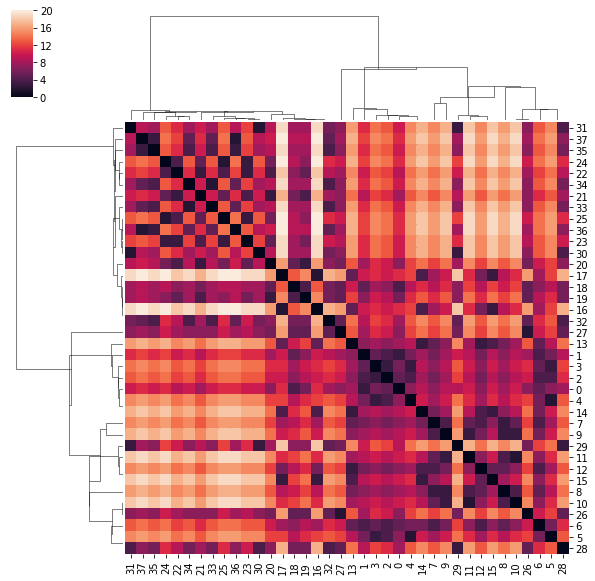

------------------------------------------------------------
alpha row: 1 -- alpha column: -1


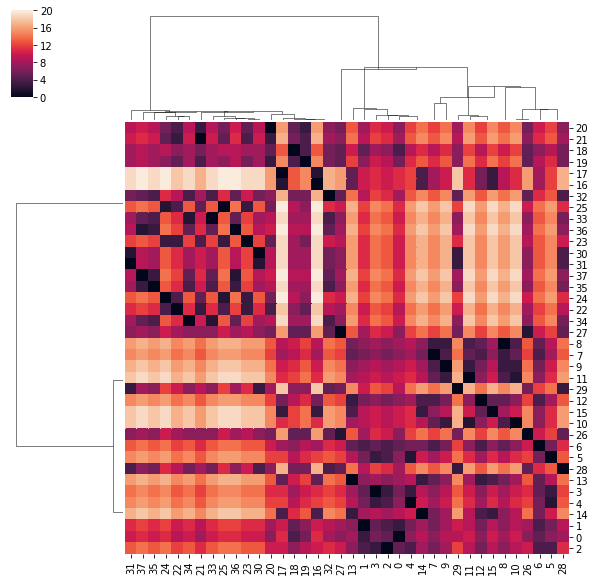

In [335]:
heatClustermap.heat_dendrogram(
    truthJet=None,
    recluster_jet1 = reclusterAntikt, 
    recluster_jet2 = reclusterKt,
    heat_map=True,
    full_path=True, 
    FigName=None)

# 1D -TREE ONLY VISUALIZATIONS

In [637]:
# Reload files after changes
importlib.reload(Tree1D)

<module 'scripts.Tree1D' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/VisualizeBinaryTrees/scripts/Tree1D.py'>

### Ordering of the leaves as they are accessed when traversing the tree

TRUTH JET


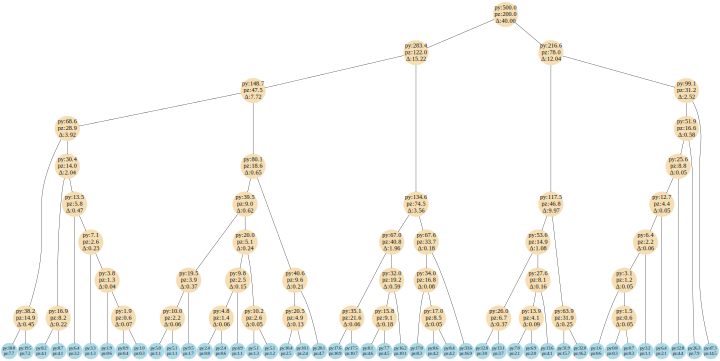

In [640]:
print('TRUTH JET')
tree = plotBinaryTree(truth_jet, label=True, pTsort=False)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


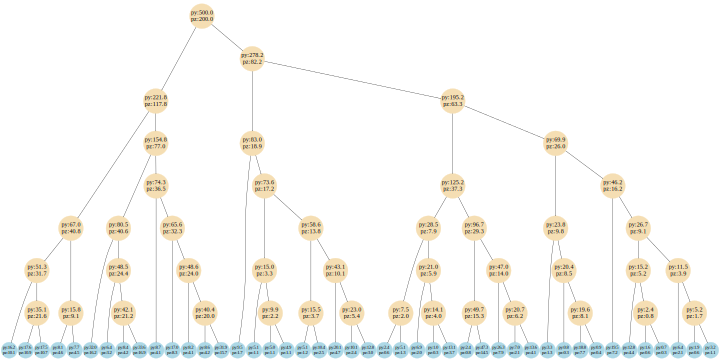

In [641]:
print('KT JET')
tree = plotBinaryTree(reclusterKt, label=True, pTsort=False)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


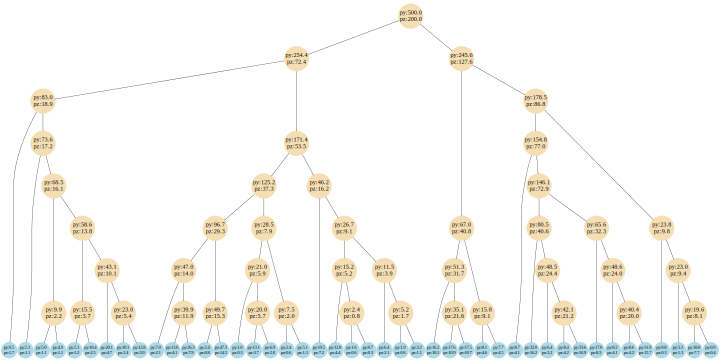

In [646]:
print('CA JET')
tree = plotBinaryTree(reclusterCA, label=True, pTsort=False)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


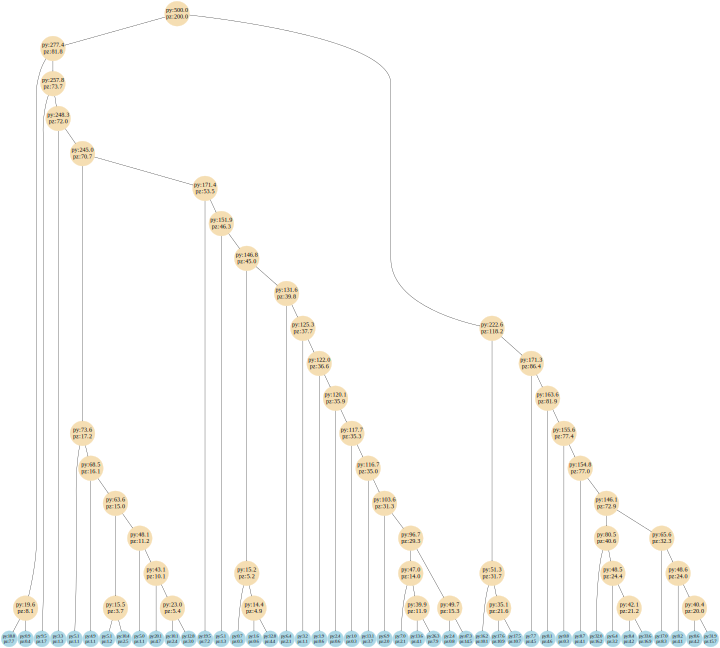

In [645]:
print('ANTIKT JET')
tree = plotBinaryTree(reclusterAntikt, label=True, pTsort=False)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.9" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

### Sort leaves by increasing  py 

TRUTH JET


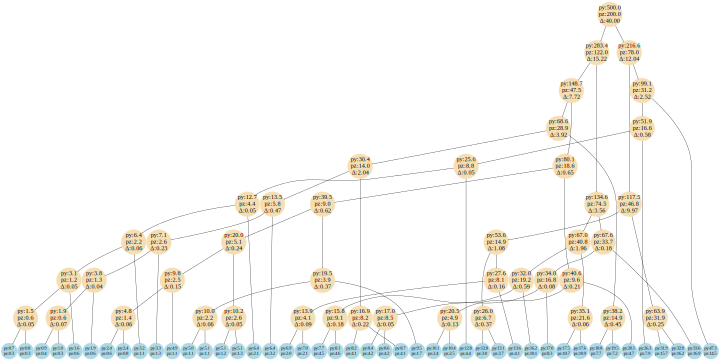

In [647]:
print('TRUTH JET')
tree = plotBinaryTree(truth_jet, label=True, pTsort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


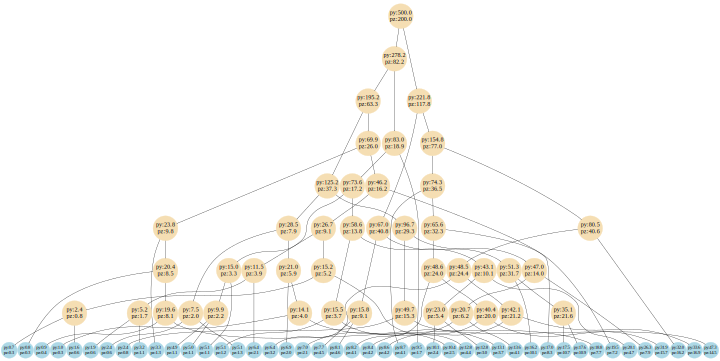

In [648]:
print('KT JET')
tree = plotBinaryTree(reclusterKt, label=True, pTsort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


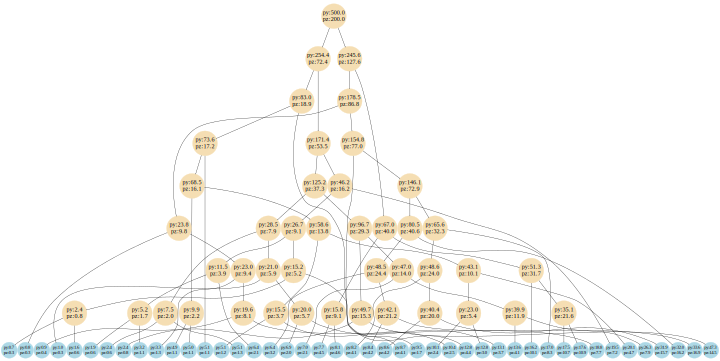

In [649]:
print('CA JET')
tree = plotBinaryTree(reclusterCA, label=True, pTsort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


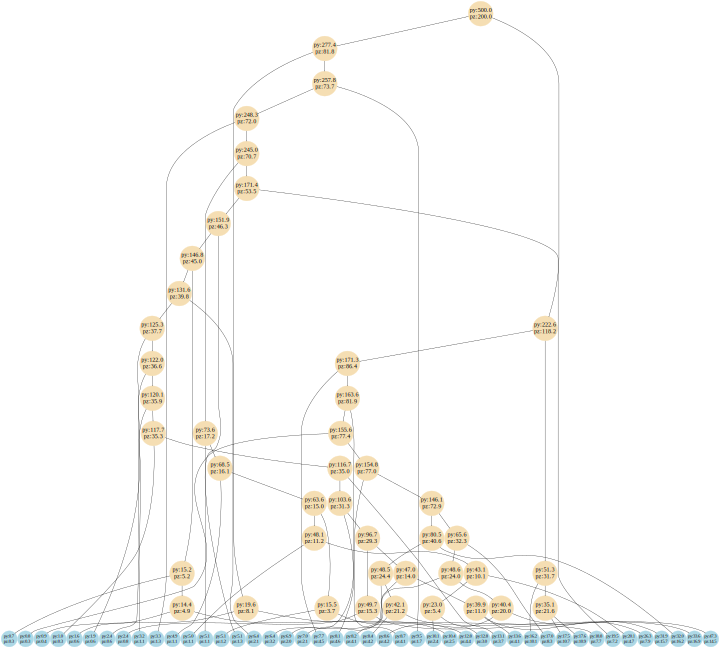

In [650]:
print('ANTIKT JET')
tree = plotBinaryTree(reclusterAntikt, label=True, pTsort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.9" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

## PAIR OF TREES COMPARISONS

### Leaves ordered as they are accessed when traversing the TRUTH JET tree

Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees


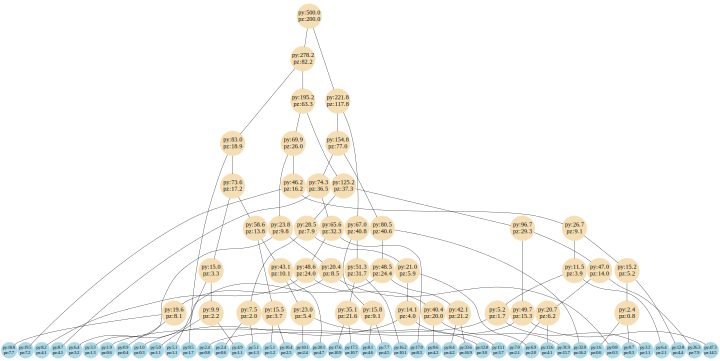

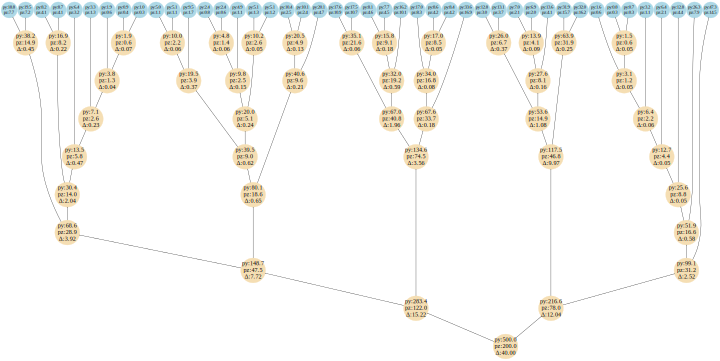

In [653]:
print("Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, truth_jet, pTsort=False, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees


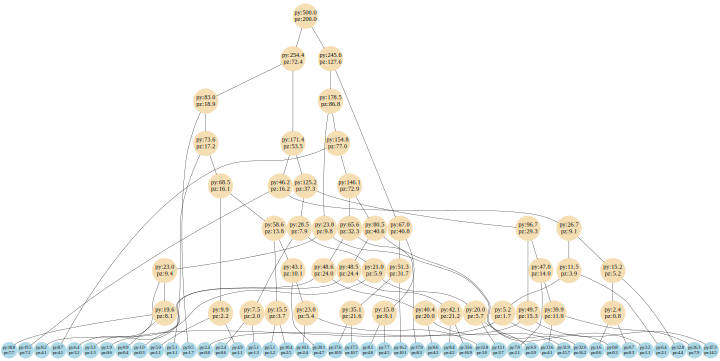

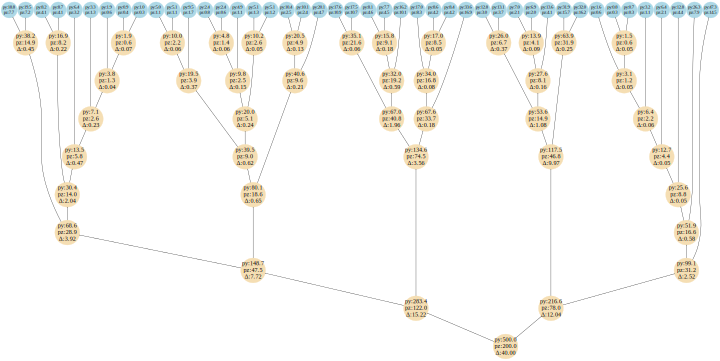

In [654]:
print("Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterCA, truth_jet, pTsort=False, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees


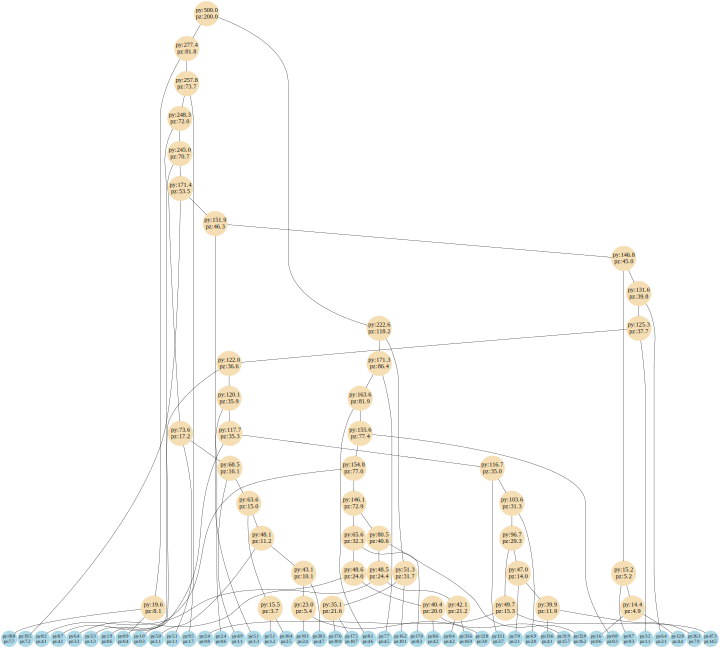

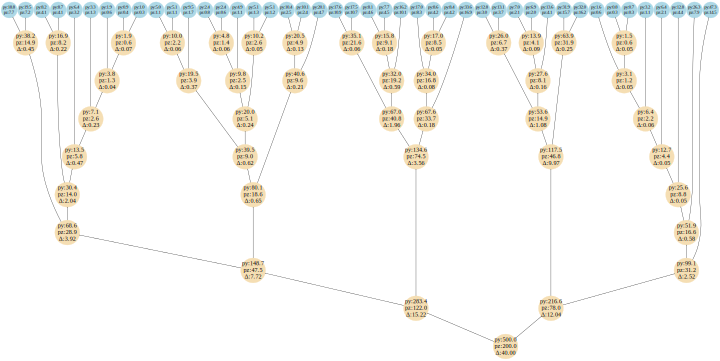

In [656]:
print("Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet, pTsort=False, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.9" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

### Leaves ordered as accessed when traversing the JET in the 1st argument of visualizeTreePair 

Leaves ordered according to truth jet - TRUTH (top) vs ANTIKT (bottom) trees


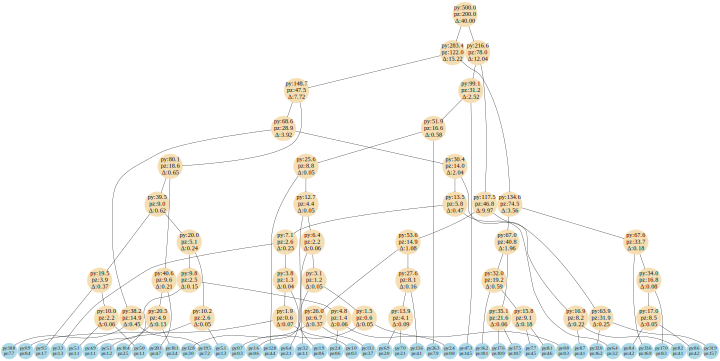

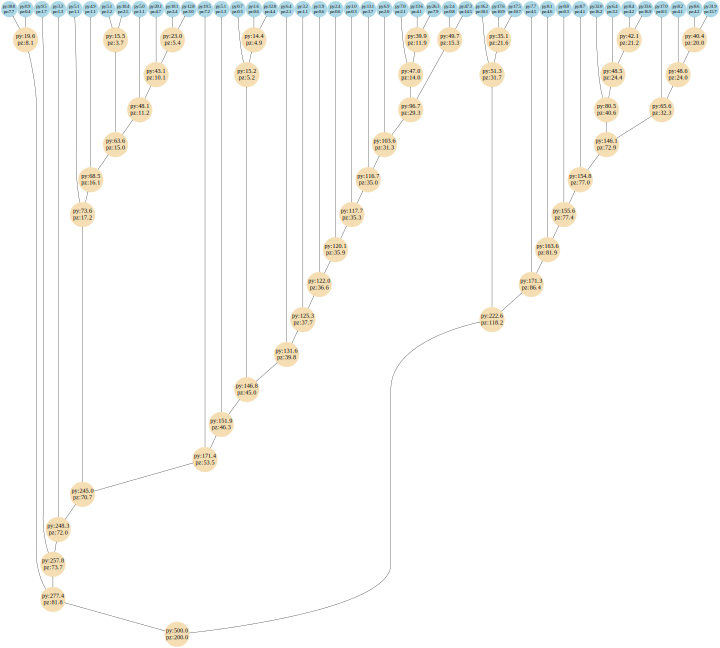

In [660]:
print("Leaves ordered according to truth jet - TRUTH (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet, pTsort=False, truthOrder=False, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.9" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - KT (top) vs ANTIKT (bottom) trees


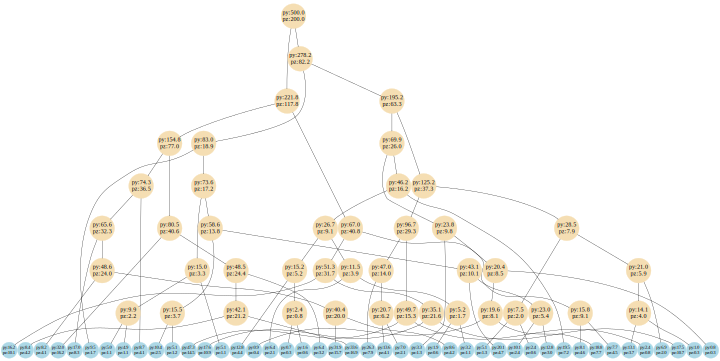

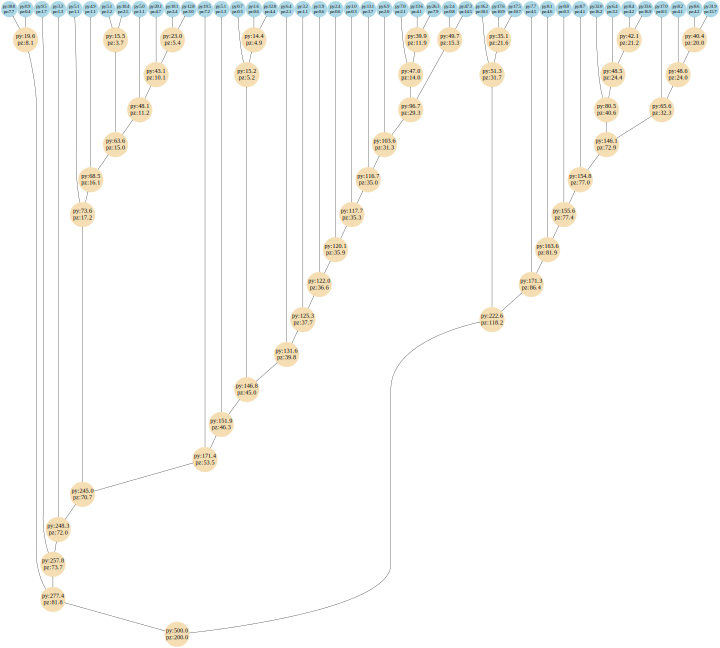

In [662]:
print("Leaves ordered according to truth jet - KT (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, reclusterKt, pTsort=False, truthOrder=False, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.9" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - CA (top) vs KT (bottom) trees


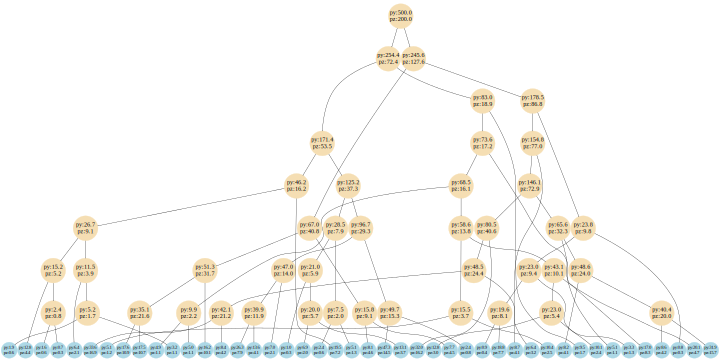

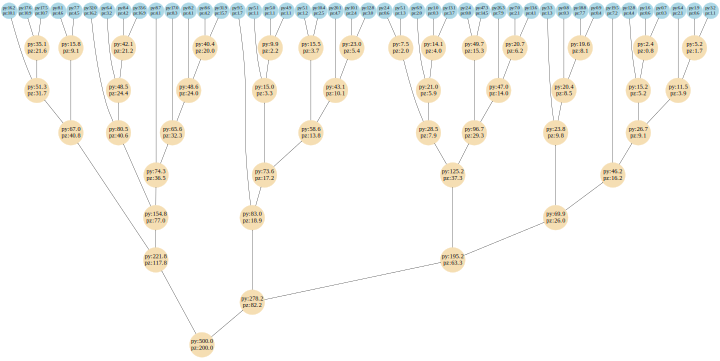

In [666]:
print("Leaves ordered according to truth jet - CA (top) vs KT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, reclusterCA, pTsort=False, truthOrder=False, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

#### Get Delta_P, Delta_L and Delta_R

In [262]:
 #-------------------------
# Load a jet
# input_jet = 'antikt_tree_18_truth_-1'
input_jet = 'tree_37_truth'

# input_jet = 'test_jet'
input_dir= 'data/'

fd = open(input_dir+ str(input_jet) + '.pkl', "rb")
jet_dic = pickle.load(fd, encoding='latin-1')
# X= pickle.load(fd,encoding='latin-1')
fd.close()

print('jet dictionary List =',jet_dic)

jet dictionary List = [{'root_id': 0, 'tree': array([[ 1,  4],
       [ 2,  3],
       [-1, -1],
       [-1, -1],
       [ 5,  6],
       [-1, -1],
       [-1, -1]]), 'content': array([[800.        , 600.        ],
       [365.14898682, 319.6317749 ],
       [183.71911621, 160.47654724],
       [181.42987061, 159.15522766],
       [434.85101318, 280.3682251 ],
       [218.06427002, 139.29244995],
       [216.78674316, 141.07577515]]), 'Lambda': tensor(10.), 'Delta_0': 60.0, 'pt_cut': 1, 'M_Hard': tensor(80.), 'deltas': array([4.0000000e+01, 1.3216047e+00, 4.4549126e-02, 8.7781742e-02,
       1.0968518e+00, 1.2979238e-02, 7.2950356e-02], dtype=float32), 'draws': array([1.        , 0.03304012, 0.03370836, 0.06642057, 0.0274213 ,
       0.01183317, 0.06650885])}]


In [255]:
jet_id=0
deltas=np.asarray(jet_dic[jet_id]['deltas'])
deltas

array([tensor(40.), tensor(2.6949, requires_grad=True),
       tensor(0.2201, requires_grad=True),
       tensor(0.0193, requires_grad=True),
       tensor(2.2398, requires_grad=True),
       tensor(0.2169, requires_grad=True),
       tensor(0.1533, requires_grad=True)], dtype=object)

In [256]:
deltas=np.asarray([entry.detach().numpy() for entry in deltas])
deltas

array([4.0000000e+01, 2.6949275e+00, 2.2006737e-01, 1.9256819e-02,
       2.2397585e+00, 2.1690315e-01, 1.5334295e-01], dtype=float32)

In [230]:
0.10712479*40

4.2849916

In [233]:
np.log(10)

2.302585092994046

In [234]:
2* np.log(1/(2*np.pi))

-3.6757541328186907

In [235]:
def likelihood(rate,x):
    return rate*np.exp(-x)

In [ ]:
likelihood(10,)

In [265]:
x_0=(-1/Lambda)*np.log(1/Lambda)
l=np.log(Lambda * np.exp(-Lambda * x_0))
display(x_0)
display(l)

tensor(0.2303)

tensor(-5.9605e-08)

In [263]:
Lambda=jet_dic[0]['Lambda']
log_likelihood=0
for entry in jet_dic[0]['draws'][1::]:
#     if entry!=-1:
        log_likelihood+=np.log(Lambda * np.exp(-Lambda * entry))
        
display(Lambda)
display(log_likelihood)

tensor(10.)

tensor(11.4262)

In [173]:
0.1484*60


8.904

In [146]:
np.log(Lambda * np.(-Lamexpbda * 0.0064))

2.2385850929940454

In [228]:
jet_id=0
node_id=0
tree=jet_dic[jet_id]['tree']
content=jet_dic[jet_id]['content']
deltas=jet_dic[jet_id]['deltas']
truth_Delta_P=deltas[node_id]
Delta_L=deltas[tree[node_id][0]]
Delta_R=deltas[tree[node_id][1]]
p_L=content[tree[node_id][0]]
p_R=content[tree[node_id][1]]
truth_Delta_P=deltas[node_id]
Delta_P=np.sqrt(1/4*np.sum((p_R-p_L)**2))

draws=jet_dic[jet_id]['draws']
r_L=draws[tree[node_id][0]]
r_R=draws[tree[node_id][1]]

In [229]:
display(Delta_L)
display(Delta_R)
display(r_L)
display(r_R)
display(p_L)
display(p_R)
display(truth_Delta_P)
display(Delta_P)

4.28499174118042

2.2430102825164795

0.10712479054927826

0.05607525631785393

array([366.99719238, 322.60122681])

array([433.00280762, 277.39877319])

40.0

40.000009547277614

In [ ]:
# from collections import OrderedDict
def inners_outers(jet, parent=None, node_id=None, outers_list=None, dendrogram=True, 
                 ancestors=None, tree_ancestors=[], parent_child_dic=None, outers_node_id=None):
    '''
    Recursive function to traverse the tree and get a list of the leaves 
    Args:
        jet: jet dictionary
        node_id: id of the current node
        outers_list: list that stores the 4-momentum of the leaves
        ancestors: 1D array with all the ancestors from root to leaf for each  a leaf.
        tree_ancestors: 2D array with all the ancestors from root to leaf where each row corresponds to a leaf.
        parent_child_dic: dictionary where each key is a parent node and the values a list of the children
        outers_node_id: list that stores the node id of the outers in the order in which we traverse the tree.
    
    Returns:
        outers_list, tree_ancestors, parent_child_dic, outers_node_id
    '''
    
    if jet["tree"][node_id, 0] == -1:
        outers_list.append(jet["content"][node_id])
        outers_node_id.append(node_id)
        
        if dendrogram:
            tree_ancestors.append(new_ancestors)
#             print('tree_ancestors=', tree_ancestors)
        
        
    else:
        parent_child_dic[node_id]=jet["tree"][node_id]
#         parent_child_dic.append([node_id,jet["tree"][node_id]])
        
        traverse_jet(jet, node_id, jet["tree"][node_id, 0],outers_list, ancestors=new_ancestors, dendrogram=dendrogram, 
                     tree_ancestors=tree_ancestors, parent_child_dic=parent_child_dic, outers_node_id=outers_node_id)
        
        traverse_jet(jet, node_id, jet["tree"][node_id, 1],outers_list, ancestors=new_ancestors, dendrogram=dendrogram, 
                     tree_ancestors=tree_ancestors, parent_child_dic=parent_child_dic, outers_node_id=outers_node_id)

        
        

        
        
    return outers_list, tree_ancestors, parent_child_dic, outers_node_id

#### Load a Jet Dictionary

In [14]:
 #-------------------------
# Load a jet
# input_jet = 'antikt_tree_18_truth_-1'
input_jet = 'tree_1_truth'
input_dir= 'data/'

with open(input_dir+ str(input_jet) + '.pkl', "rb") as fd:
    jet_dic = pickle.load(fd, encoding='latin-1')[0]

print('jet dictionary =',jet_dic)

jet dictionary = {'root_id': 0, 'tree': array([[ 1,  4],
       [ 2,  3],
       [-1, -1],
       [-1, -1],
       [ 5,  6],
       [-1, -1],
       [-1, -1]]), 'content': array([[800.     , 600.     ],
       [439.63068, 305.42316],
       [219.12236, 153.87575],
       [220.50832, 151.54741],
       [360.36932, 294.57684],
       [182.90085, 148.73407],
       [177.46848, 145.84277]], dtype=float32), 'Lambda': tensor(10.), 'Delta_0': 60.0, 'pt_cut': 1, 'M_Hard': tensor(80.), 'deltas': array([40.        ,  1.35480571, -1.        , -1.        ,  3.07693529,
       -1.        , -1.        ]), 'draws': array([ 0.23025851,  0.03387014, -1.        , -1.        ,  0.07692339,
       -1.        , -1.        ])}


In [394]:
# input_jet='tree_13_truth'
# node_id_antikt, linkage_list_antikt, Nconst_antikt, tree_ancestors_antikt = recluster(input_jet, alpha=-1)

In [73]:
temp_outers_list, temp_tree_ancestors = runTraverse_jet('tree_31_truth')


In [751]:
# temp_outers_list

In [74]:
np.sum(np.sum(np.array(temp_outers_list) < 0, axis=1))

0